In [1]:
import pandas as pd
import numpy as np
import pickle


In [2]:
data=pd.read_csv("D:/MSc(ASA)/Python/NLP/train.csv")

In [3]:
data.shape

(120000, 3)

In [4]:
data.head()

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [5]:
df=pd.DataFrame({'Title':data['Class Index'],'Description':data['Title'] + ' ' + data['Description']})
print(df.head(6))
print(df.shape)


   Title                                        Description
0      3  Wall St. Bears Claw Back Into the Black (Reute...
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...
2      3  Oil and Economy Cloud Stocks' Outlook (Reuters...
3      3  Iraq Halts Oil Exports from Main Southern Pipe...
4      3  Oil prices soar to all-time record, posing new...
5      3  Stocks End Up, But Near Year Lows (Reuters) Re...
(120000, 2)


In [6]:
combined_df = df.groupby('Title')['Description'].apply(lambda texts: ' '.join(texts))
combined_df.index=['World','Sports', 'Business', 'Sci/Tech']
combined_df=pd.DataFrame(combined_df)
print(combined_df)

                                                Description
World     Venezuelans Vote Early in Referendum on Chavez...
Sports    Phelps, Thorpe Advance in 200 Freestyle (AP) A...
Business  Wall St. Bears Claw Back Into the Black (Reute...
Sci/Tech  'Madden,' 'ESPN' Football Score in Different W...


In [7]:
len(combined_df.Description.loc['World'])

7308345

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VEDSD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VEDSD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation,
       remove words containing numbers, and remove stop words.'''
    # Convert text to lowercase
    text = text.lower()
    
    # Remove text within square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    
    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    
    # Remove specific punctuation marks
    text = re.sub(r'[‘’“”…]', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words
    cleaned_words = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text



round1 = lambda x: clean_text_round1(x)

In [10]:
data_clean = pd.DataFrame(combined_df.Description.apply(round1))
len(data_clean.Description.loc['World'])

5660811

In [11]:
data_clean.Description.loc['World']

'venezuelans vote early referendum chavez rule reuters reuters venezuelans turned earlyand large numbers sunday vote historic referendumthat either remove leftwing president hugo chavez fromoffice give new mandate govern next twoyears skoreans clash police iraq troop dispatch reuters reuters south korean police used water cannon incentral seoul sunday disperse least protestersurging government reverse controversial decision tosend troops iraq palestinians israeli jails start hunger strike reuters reuters thousands palestinianprisoners israeli jails began hunger strike betterconditions sunday israels security minister said hedidnt care starved death seven georgian soldiers wounded south ossetia ceasefire violated afp afp sporadic gunfire shelling took place overnight disputed georgian region south ossetia violation fragile ceasefire wounding seven georgian servicemen rwandan troops arrive darfur ap ap dozens rwandan soldiers flew sudans troubled darfur region sunday first foreign armed 

In [12]:
df.to_pickle('dataframe.pkl')


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

aa  aaa  aac  aacbto  aachen  aai  aaii  aain  aal  aalborg  ...  \
World      0    0    0       0       0    0     0     0    1        0  ...   
Sports     0    2    0       0       6    0     0     0    0        1  ...   
Business   7    8    0       1       0    1     1     1    0        0  ...   
Sci/Tech   1    1    3       0       0    0     0     0    0        0  ...   

          zvonareva  zwick  zwiki  zydrunas  zygmunt  zyman  zyprexa  zz  zzz  \
World             0      0      0         0        0      0        0   0    0   
Sports           50      9      0         5        0      0        0   1    0   
Business          0      0      0         0        1      2        1   0    0   
Sci/Tech          0      0      1         0        0      0        0   0    1   

          zzzzzz  
World          0  
Sports         1  
Business       0  
Sci/Tech       0  

[4 rows x 90384 columns]

In [14]:
data_dtm.to_pickle("dtm.pkl")

In [15]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [16]:
#finding top words in each Title

data_top = pd.read_pickle('dtm.pkl')
data_top = data_top.transpose()
data_top.head()



World  Sports  Business  Sci/Tech
aa          0       0         7         1
aaa         0       2         8         1
aac         0       0         0         3
aacbto      0       0         1         0
aachen      0       6         0         0

In [17]:
top_dict = {}
for c in data_top.columns:
    top = data_top[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'World': [('said', 7661),
  ('us', 6290),
  ('ap', 5754),
  ('iraq', 5424),
  ('reuters', 5405),
  ('president', 4172),
  ('new', 3452),
  ('afp', 3383),
  ('two', 3340),
  ('minister', 3308),
  ('killed', 3160),
  ('people', 2827),
  ('government', 2532),
  ('un', 2434),
  ('iraqi', 2399),
  ('prime', 2344),
  ('bush', 2308),
  ('baghdad', 2188),
  ('monday', 2135),
  ('security', 2089),
  ('police', 2060),
  ('wednesday', 2034),
  ('says', 2033),
  ('thursday', 2004),
  ('officials', 1950),
  ('friday', 1950),
  ('tuesday', 1927),
  ('leader', 1897),
  ('palestinian', 1893),
  ('nuclear', 1891)],
 'Sports': [('ap', 6247),
  ('new', 4109),
  ('first', 3899),
  ('game', 3647),
  ('win', 3447),
  ('team', 3261),
  ('season', 3157),
  ('night', 2986),
  ('world', 2956),
  ('last', 2771),
  ('cup', 2751),
  ('one', 2678),
  ('two', 2659),
  ('victory', 2649),
  ('league', 2637),
  ('sunday', 2366),
  ('coach', 2297),
  ('lead', 2095),
  ('saturday', 2039),
  ('sports', 1956),
  ('back', 

In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for news in data_top.columns:
    top = [word for (word, count) in top_dict[news]]
    for t in top:
        words.append(t)
        
words

['said',
 'us',
 'ap',
 'iraq',
 'reuters',
 'president',
 'new',
 'afp',
 'two',
 'minister',
 'killed',
 'people',
 'government',
 'un',
 'iraqi',
 'prime',
 'bush',
 'baghdad',
 'monday',
 'security',
 'police',
 'wednesday',
 'says',
 'thursday',
 'officials',
 'friday',
 'tuesday',
 'leader',
 'palestinian',
 'nuclear',
 'ap',
 'new',
 'first',
 'game',
 'win',
 'team',
 'season',
 'night',
 'world',
 'last',
 'cup',
 'one',
 'two',
 'victory',
 'league',
 'sunday',
 'coach',
 'lead',
 'saturday',
 'sports',
 'back',
 'us',
 'second',
 'sox',
 'time',
 'red',
 'york',
 'reuters',
 'games',
 'final',
 'us',
 'said',
 'reuters',
 'new',
 'oil',
 'inc',
 'prices',
 'company',
 'percent',
 'york',
 'corp',
 'million',
 'profit',
 'sales',
 'stocks',
 'monday',
 'wednesday',
 'tuesday',
 'billion',
 'thursday',
 'friday',
 'shares',
 'year',
 'group',
 'yesterday',
 'market',
 'business',
 'dollar',
 'lta',
 'bank',
 'new',
 'microsoft',
 'ap',
 'said',
 'software',
 'reuters',
 'inter

In [19]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('us', 4),
 ('reuters', 4),
 ('new', 4),
 ('said', 3),
 ('ap', 3),
 ('two', 2),
 ('monday', 2),
 ('security', 2),
 ('wednesday', 2),
 ('thursday', 2),
 ('friday', 2),
 ('tuesday', 2),
 ('first', 2),
 ('world', 2),
 ('one', 2),
 ('york', 2),
 ('inc', 2),
 ('company', 2),
 ('corp', 2),
 ('iraq', 1),
 ('president', 1),
 ('afp', 1),
 ('minister', 1),
 ('killed', 1),
 ('people', 1),
 ('government', 1),
 ('un', 1),
 ('iraqi', 1),
 ('prime', 1),
 ('bush', 1),
 ('baghdad', 1),
 ('police', 1),
 ('says', 1),
 ('officials', 1),
 ('leader', 1),
 ('palestinian', 1),
 ('nuclear', 1),
 ('game', 1),
 ('win', 1),
 ('team', 1),
 ('season', 1),
 ('night', 1),
 ('last', 1),
 ('cup', 1),
 ('victory', 1),
 ('league', 1),
 ('sunday', 1),
 ('coach', 1),
 ('lead', 1),
 ('saturday', 1),
 ('sports', 1),
 ('back', 1),
 ('second', 1),
 ('sox', 1),
 ('time', 1),
 ('red', 1),
 ('games', 1),
 ('final', 1),
 ('oil', 1),
 ('prices', 1),
 ('percent', 1),
 ('million', 1),
 ('profit', 1),
 ('sales', 1),
 ('stocks', 1),
 

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
add_stop_words=['reuters','new','said','ap','us','two','monday','tuesday','sunday','friday','first','tuesday','wednesday','saturday']
stop_words = ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words_list = list(stop_words)

In [21]:

def clean_text_round2(text):
    
    cleaned_words = [word for word in words if word not in stop_words_list]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

round2 = lambda x: clean_text_round1(x)

In [22]:
data_clean = pd.DataFrame(data_clean.Description.apply(round2))
len(data_clean.Description.loc['World'])

5213389

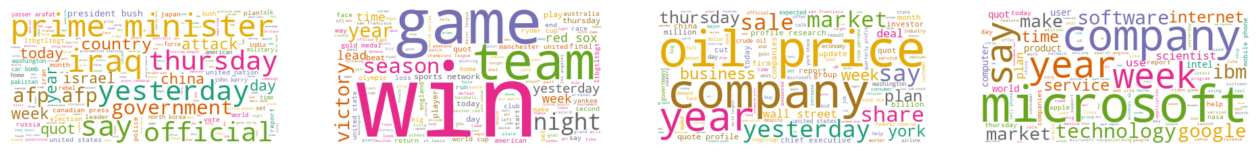

NameError: name 'savefig' is not defined

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]
for index, topics in enumerate(data_top.columns):
    wc.generate(data_clean.Description[topics])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()


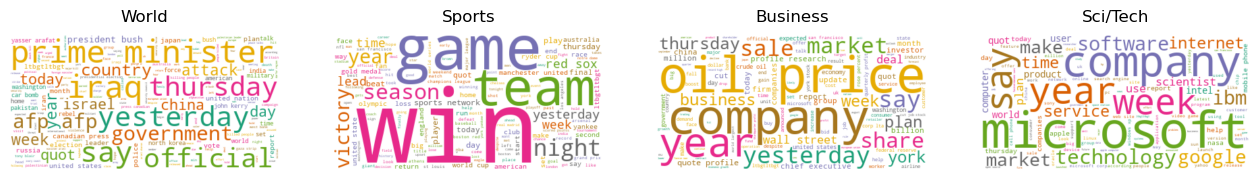

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Labels for the four subplots
labels = ["World", "Sports", "Business", "Sci/Tech"]

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16, 6]
for index, topics in enumerate(data_top.columns[:4]):  # Limit to first 4 columns
    wc.generate(data_clean.Description[topics])
    
    plt.subplot(1, 4, index+1)  # Adjust subplot arrangement to 1 row and 4 columns
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(labels[index], fontsize=12, pad=10)  # Add title with padding

# Save the figure as a JPG file
plt.savefig("wordclouds.jpg", format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [24]:
data.head()

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [25]:
Y_train=data['Class Index']-1
print(Y_train.head())
print(Y_train.shape)

0    2
1    2
2    2
3    2
4    2
Name: Class Index, dtype: int64
(120000,)


In [26]:
X_train=(data['Title']+data['Description'])


In [27]:
print(X_train.head())
print(X_train.shape)

0    Wall St. Bears Claw Back Into the Black (Reute...
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2    Oil and Economy Cloud Stocks' Outlook (Reuters...
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
dtype: object
(120000,)


In [28]:
revised_data=pd.DataFrame({'Description':X_train,'Target':Y_train})
revised_data.head(100)

Description  Target
0   Wall St. Bears Claw Back Into the Black (Reute...       2
1   Carlyle Looks Toward Commercial Aerospace (Reu...       2
2   Oil and Economy Cloud Stocks' Outlook (Reuters...       2
3   Iraq Halts Oil Exports from Main Southern Pipe...       2
4   Oil prices soar to all-time record, posing new...       2
..                                                ...     ...
95  Gene Blocker Turns Monkeys Into Workaholics - ...       3
96  Dolphins Too Have Born Socialites (Reuters)Reu...       3
97  What's in a Name? Well, Matt Is Sexier Than Pa...       3
98  UK Scientists Allowed to Clone Human Embryos (...       3
99  Russian Alien Spaceship Claims Raise Eyebrows,...       3

[100 rows x 2 columns]

In [29]:
New_data_clean1 = pd.DataFrame(revised_data.Description.apply(round1))
New_data_clean1 = pd.DataFrame(revised_data.Description.apply(round2))
New_data_clean1.head(50)

Description
0   wall st bears claw black reutersreuters shorts...
1   carlyle looks commercial aerospace reutersreut...
2   oil economy cloud stocks outlook reutersreuter...
3   iraq halts oil exports main southern pipeline ...
4   oil prices soar alltime record posing menace e...
5   stocks end near year lows reutersreuters stock...
6   money funds fell latest week apap assets natio...
7   fed minutes dissent inflation usatodaycomusato...
8   safety net forbescomforbescom earning phd soci...
9   wall st bears claw black york shortsellers wal...
10  oil economy cloud stocks outlook york soaring ...
11  need opec pump moreiran gov tehran opec douse ...
12  nonopec nations outputpurnomo jakarta nonopec ...
13  google ipo auction rocky start washingtonnew y...
14  dollar falls broadly record trade gap york dol...
15  rescuing old saverif think need help elderly r...
16  kids rule backtoschoolthe purchasing power kid...
17  market head value fundsthere little cause cele...
18  trade deficit swells junethe trade deficit exp...
19  shell target totaloil giant shell bracing take...
20  google ipo faces playboy slipupthe bidding get...
21  eurozone economy keeps growingofficial figures...
22  expansion slows japaneconomic growth japan slo...
23  rand falls shock sa rate cutinterest rates tri...
24  car prices boardthe cost buying second hand ca...
25  south korea lowers ratessouth koreas central b...
26  google auction begins fridayan auction shares ...
27  hp shares tumble profit newshewlettpackard sha...
28  mauritian textile firm cuts jobsone oldest tex...
29  chad seeks refugee aid imfchad asks imf loan p...
30  japan nuclear firm shuts plantsthe company run...
31  veteran inventor market floattrevor baylis vet...
32  saudi arabia open oil tapssaudi arabia says re...
33  saudi phone sector gets lifta group led uaes e...
34  indians rail skills shortagenetwork rail flies...
35  steady gobedford scientists nitromed hope expe...
36  google ipo type confusing secrecyive submitted...
37  bargain hunters paradisemassachusetts bargain ...
38  researchers seek untangle email threademail vi...
39  microsoft corp kinder corporate cultureeven ge...
40  letterstarget abusers legal weapons share outr...
41  gleam gloompresident bush saying economy turne...
42  technology company sues exemployees marlboroug...
43  grant aid lynn central squarecentral square ly...
44  state grant aid lynn bank gives salem square l...
45  legal chapter flameouta lawsuit gary winnick c...
46  russia oil superpower flex musclesrussia emerg...
47  switching titles gears dellkevin b rollins chi...
48  sale ultimate status symbolwith country need c...
49  quality gets swept awayquality distribution ha...

In [30]:
test=pd.read_csv("D:/MSc(ASA)/Python/NLP/test.csv")

test=pd.DataFrame({'Description':test['Title']+test['Description'],'Target':test['Class Index']-1})
test_clean = pd.DataFrame(test.Description.apply(round1))
test_clean = pd.DataFrame(test.Description.apply(round2))
test_clean.head(10)

Description
0  fears t n pension talksunions representing wor...
1  race second private team sets launch date huma...
2  ky company wins grant study peptides apap comp...
3  prediction unit helps forecast wildfires apap ...
4  calif aims limit farmrelated smog apap souther...
5  open letter british copyright indoctrination s...
6  loosing war terrorismsven jaschan selfconfesse...
7  foafkey foaf pgp key distribution bloom filter...
8  email scam targets police chiefwiltshire polic...
9  card fraud unit nets cardsin years uks dedicat...

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [32]:
vectorizer = TfidfVectorizer()
# Transform the text data into TF-IDF features
X = vectorizer.fit_transform(New_data_clean1['Description'])

# Target labels
y = revised_data['Target']

In [33]:
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X, y)

DecisionTreeClassifier()

In [34]:
X_test=vectorizer.transform(test_clean['Description'])

In [35]:
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Training feature shape:", X.shape)
print("Test feature shape:", X_test.shape)

Vocabulary size: 155732
Training feature shape: (120000, 155732)
Test feature shape: (7600, 155732)


In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(test['Target'], y_pred))
print("\nClassification Report:\n", classification_report(test['Target'], y_pred))

Accuracy: 0.8260526315789474

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1900
           1       0.88      0.90      0.89      1900
           2       0.78      0.79      0.78      1900
           3       0.79      0.77      0.78      1900

    accuracy                           0.83      7600
   macro avg       0.83      0.83      0.83      7600
weighted avg       0.83      0.83      0.83      7600



In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
nb_clf = MultinomialNB()

# Train the model
nb_clf.fit(X, y)


MultinomialNB()

In [40]:
# Predict on the test set
y_pred = nb_clf.predict(X_test)

In [41]:

# Print evaluation metrics
print("Accuracy:", accuracy_score(test['Target'], y_pred))
print("\nClassification Report:\n", classification_report(test['Target'], y_pred))

Accuracy: 0.9002631578947369

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1900
           1       0.95      0.97      0.96      1900
           2       0.86      0.86      0.86      1900
           3       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [42]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('X.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(test['Target'], f)

In [43]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\VEDSD


In [44]:
# Predict on the training set
y_train_pred = nb_clf.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)

test_accuracy = accuracy_score(test['Target'], y_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Classification Report
print("\nTraining Classification Report:\n", classification_report(y, y_train_pred))
print("\nTest Classification Report:\n", classification_report(test['Target'], y_pred))


Training Accuracy: 0.9226416666666667
Test Accuracy: 0.9002631578947369

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     30000
           1       0.96      0.98      0.97     30000
           2       0.89      0.90      0.89     30000
           3       0.91      0.90      0.90     30000

    accuracy                           0.92    120000
   macro avg       0.92      0.92      0.92    120000
weighted avg       0.92      0.92      0.92    120000


Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1900
           1       0.95      0.97      0.96      1900
           2       0.86      0.86      0.86      1900
           3       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      

In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(nb_clf, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.879      0.89316667 0.89275    0.909375   0.89566667]
Average Cross-Validation Score: 0.8939916666666667
